In [291]:
import os
import pandas as pd
from newsapi import NewsApiClient
%matplotlib inline

In [292]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [293]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [294]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [321]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin AND BTC",
    language="en",
    page_size=100
)

In [322]:
# Fetch the Ethereum news articles
Ethereum_headlines = newsapi.get_everything(
    q="ethereum AND ETH",
    language="en",
    page_size=100
)

In [323]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['content'])
      
        bitcoin_sentiments.append({
            "Text": article["content"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols =["Compound", "Negative", "Neutral", "Positive", "Text"]
btc_df = btc_df[cols]

btc_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.5070,0.000,0.933,0.067,Our robot colleague Satoshi Nakaboto writes ab...
1,0.3400,0.000,0.941,0.059,"UK police raised £300,000 ($369,000) through t..."
2,-0.8519,0.255,0.683,0.062,"Interest in Bitcoin, the censorship resistant ..."
3,0.5070,0.000,0.933,0.067,Our robot colleague Satoshi Nakaboto writes ab...
4,-0.0772,0.048,0.911,0.041,"UK police are set to auction around $662,000 (..."


In [324]:
# Create the Bitcoin sentiment scores DataFrame
Ethereum_sentiments = []

for article in Ethereum_headlines["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['content'])
      
        Ethereum_sentiments.append({
            "Text": article["content"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(Ethereum_sentiments)

# Reorder DataFrame columns
cols =["Compound", "Negative", "Neutral", "Positive", "Text"]
eth_df = eth_df[cols]

eth_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.1027,0.054,0.882,0.063,"Further to its previous blockchain exploits, t..."
1,-0.8232,0.210,0.735,0.055,"MakerDAO, the decentralized organization that ..."
2,0.2500,0.033,0.911,0.056,"Australias Perth Mint, one of the worlds large..."
3,0.1901,0.000,0.956,0.044,Blockchains like Ethereums are often pitched a...
4,0.6879,0.000,0.886,0.114,Our robot colleague Satoshi Nakaboto writes ab...


In [325]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Negative,Neutral,Positive
count,98.000000,98.000000,98.000000,98.000000
mean,0.051348,0.059806,0.876286,0.063949
std,0.500581,0.066957,0.073223,0.049599
min,-0.851900,0.000000,0.683000,0.000000
25%,-0.416600,0.000000,0.824500,0.027750
50%,0.000000,0.043500,0.888000,0.065000
75%,0.507000,0.114750,0.932000,0.088500
max,0.827100,0.255000,1.000000,0.203000


In [326]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Negative,Neutral,Positive
count,99.000000,99.000000,99.000000,99.000000
mean,0.057148,0.043192,0.900899,0.055879
std,0.406622,0.055563,0.078586,0.054729
min,-0.823200,0.000000,0.690000,0.000000
25%,-0.214300,0.000000,0.837500,0.000000
50%,0.000000,0.000000,0.907000,0.055000
75%,0.383250,0.069000,0.963000,0.089000
max,0.827100,0.234000,1.000000,0.203000


### Questions:

Q: Which coin had the highest mean positive score?

A: *Bitcoin*

Q: Which coin had the highest compound score?

A: *Ethereum*

Q. Which coin had the highest positive score?

A: *Ethereum*

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [327]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [328]:
# Expand the default stop words list if necessary
addl_stopwords = [',','`', '']

In [329]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    text = word_tokenize(text)
    
    # Convert the words to lowercase
    text = [word.lower() for word in text]
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    text = [regex.sub('', word) for word in text]
    
    # Remove the stop words    
    sw = set(stopwords.words('english') + addl_stopwords)

    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    text = [word for word in text if word not in sw]
    return text


In [330]:
# Create a new tokens column for bitcoin
btc_tokens = []
[btc_tokens.append(tokenizer(text)) for text in btc_df.Text]   
btc_df['Tokens'] = btc_tokens
btc_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.5070,0.000,0.933,0.067,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
1,0.3400,0.000,0.941,0.059,"UK police raised £300,000 ($369,000) through t...","[uk, police, raised, auction, criminallyseized..."
2,-0.8519,0.255,0.683,0.062,"Interest in Bitcoin, the censorship resistant ...","[interest, bitcoin, censorship, resistant, cry..."
3,0.5070,0.000,0.933,0.067,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
4,-0.0772,0.048,0.911,0.041,"UK police are set to auction around $662,000 (...","[uk, police, set, auction, around, worth, crim..."


In [331]:
# Create a new tokens column for ethereum
eth_tokens = []
[eth_tokens.append(tokenizer(text)) for text in eth_df.Text]   
eth_df['Tokens'] = eth_tokens
eth_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.1027,0.054,0.882,0.063,"Further to its previous blockchain exploits, t...","[previous, blockchain, exploit, united, nation..."
1,-0.8232,0.210,0.735,0.055,"MakerDAO, the decentralized organization that ...","[makerdao, decentralized, organization, run, e..."
2,0.2500,0.033,0.911,0.056,"Australias Perth Mint, one of the worlds large...","[australia, perth, mint, one, world, largest, ..."
3,0.1901,0.000,0.956,0.044,Blockchains like Ethereums are often pitched a...,"[blockchains, like, ethereums, often, pitched,..."
4,0.6879,0.000,0.886,0.114,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [332]:
bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in btc_df.Tokens]
dict(bigram_counts[0].most_common(20))

{('satoshi', 'nakaboto'): 2,
 ('robot', 'colleague'): 1,
 ('colleague', 'satoshi'): 1,
 ('nakaboto', 'writes'): 1,
 ('writes', 'bitcoin'): 1,
 ('bitcoin', 'btc'): 1,
 ('btc', 'every'): 1,
 ('every', 'fucking'): 1,
 ('fucking', 'day'): 1,
 ('day', 'welcome'): 1,
 ('welcome', 'another'): 1,
 ('another', 'edition'): 1,
 ('edition', 'bitcoin'): 1,
 ('bitcoin', 'today'): 1,
 ('today', 'satoshi'): 1,
 ('nakaboto', 'tell'): 1,
 ('tell', 'whats'): 1,
 ('whats', 'going'): 1,
 ('going', 'bitcoin'): 1,
 ('bitcoin', 'past'): 1}

In [333]:
from collections import Counter
from nltk import ngrams

In [334]:
# Generate the Bitcoin N-grams where N=2
btc_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in btc_df.Tokens]
dict(btc_bigram_counts[0].most_common(20))

{('satoshi', 'nakaboto'): 2,
 ('robot', 'colleague'): 1,
 ('colleague', 'satoshi'): 1,
 ('nakaboto', 'writes'): 1,
 ('writes', 'bitcoin'): 1,
 ('bitcoin', 'btc'): 1,
 ('btc', 'every'): 1,
 ('every', 'fucking'): 1,
 ('fucking', 'day'): 1,
 ('day', 'welcome'): 1,
 ('welcome', 'another'): 1,
 ('another', 'edition'): 1,
 ('edition', 'bitcoin'): 1,
 ('bitcoin', 'today'): 1,
 ('today', 'satoshi'): 1,
 ('nakaboto', 'tell'): 1,
 ('tell', 'whats'): 1,
 ('whats', 'going'): 1,
 ('going', 'bitcoin'): 1,
 ('bitcoin', 'past'): 1}

In [335]:
# Generate the Ethereum N-grams where N=2
eth_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in eth_df.Tokens]
dict(eth_bigram_counts[0].most_common(20))

{('previous', 'blockchain'): 1,
 ('blockchain', 'exploit'): 1,
 ('exploit', 'united'): 1,
 ('united', 'nation'): 1,
 ('nation', 'childrens'): 1,
 ('childrens', 'fund'): 1,
 ('fund', 'commonly'): 1,
 ('commonly', 'known'): 1,
 ('known', 'unicef'): 1,
 ('unicef', 'taking'): 1,
 ('taking', 'donation'): 1,
 ('donation', 'cryptocurrency'): 1,
 ('cryptocurrency', 'according'): 1,
 ('according', 'announcement'): 1,
 ('announcement', 'earlier'): 1,
 ('earlier', 'today'): 1,
 ('today', 'unicef'): 1,
 ('unicef', 'setting'): 1,
 ('setting', 'cryptocurrency'): 1,
 ('cryptocurrency', 'fund'): 1}

In [336]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [337]:
# Get the top 10 words for Bitcoin
bigstr = []
for tokens in btc_df.Tokens:
    bigstr += tokens
btc_token_count = token_count(bigstr)
btc_token_count

[('bitcoin', 141),
 ('char', 98),
 ('li', 79),
 ('btc', 49),
 ('satoshi', 43),
 ('nakaboto', 38),
 ('ha', 34),
 ('day', 29),
 ('today', 26),
 ('hour', 26)]

In [338]:
# Get the top 10 words for Ethereum
bigstr = []
for tokens in eth_df.Tokens:
    bigstr += tokens
eth_token_count = token_count(bigstr)
eth_token_count

[('char', 99),
 ('li', 86),
 ('ethereum', 58),
 ('bitcoin', 46),
 ('eth', 40),
 ('price', 38),
 ('ha', 31),
 ('crypto', 26),
 ('market', 26),
 ('cryptocurrency', 25)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [340]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

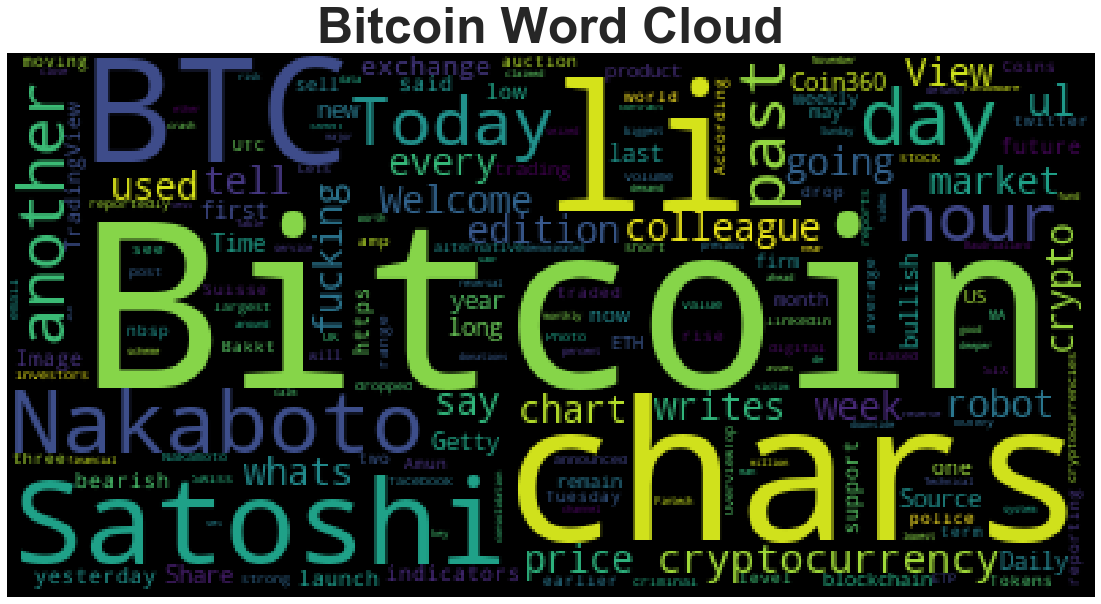

In [359]:
# Generate the Bitcoin word cloud
btc_corpus = ''
for token in btc_df.Text:
    btc_corpus += token
wc = WordCloud(collocations=False).generate(btc_corpus)
plt.title('Bitcoin Word Cloud', fontsize=50, fontweight='bold')
plt.style.use('seaborn-whitegrid')
plt.imshow(wc)
plt.axis("off")
plt.show()

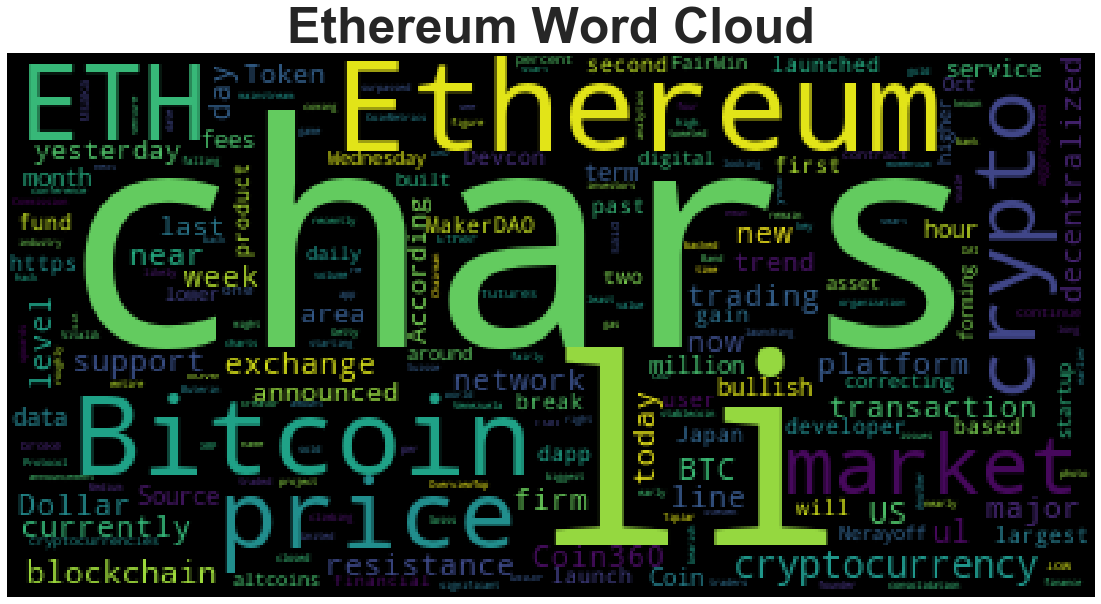

In [358]:
# Generate the Ethereum word cloud
eth_corpus = ''
for token in eth_df.Text:
    eth_corpus += token
wc = WordCloud(collocations=False).generate(eth_corpus)
plt.title('Ethereum Word Cloud', fontsize=50, fontweight='bold')
plt.style.use('seaborn-whitegrid')
plt.imshow(wc)
plt.axis("off")
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [360]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [361]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [363]:
# Concatenate all of the bitcoin text together
btc_corpus

'Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you whats been going on with Bitcoin in the past 24 hours. As Rousseau used to say: Lets get this br… [+2873 chars]UK police raised £300,000 ($369,000) through the auction of criminally-seized Bitcoin BTC and other cryptocurrency this week, achieving over market value.\r\nThe sales, a first for UK police, occurred across two unreserved auctions that were finalized on Septem… [+2085 chars]Interest in Bitcoin, the censorship resistant cryptocurrency, often spikes during times of political or economic unrest. Its no accident that Satoshi Nakamoto embedded a reference to the financial crisis in Bitcoins genesis block.\r\nIndeed, Bitcoin volumes hav… [+1962 chars]Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you whats 

In [371]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_corpus)
btc_ner.user_data["title"] = "Bitcoin NER"
# Add a title to the document

In [373]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [411]:
btc_ents = set([ent.text for ent in btc_ner.ents ])
btc_ents

{'$10 billion',
 '+10215',
 '+1111',
 '+1365',
 '+24769',
 '+2975 chars]Our',
 '+2981',
 '+3352 chars]Our',
 '+4535',
 '+7821',
 '+9423',
 '+943 chars]Bitcoin BTC',
 '-0.02%',
 '1',
 '1.Table 1',
 '10',
 '10,115',
 '10,120',
 '123%',
 '12:00',
 '16:00 UTC',
 '17%',
 '20',
 '200',
 '200-day',
 '2015',
 '2018',
 '2019',
 '230,000',
 '30 minutes',
 '300,000',
 '369,000',
 '385',
 '41.6 million',
 '45 million Rubles',
 '5,200',
 '5.1 percent',
 '500,000',
 '7,300',
 '7,500',
 '7,750.</li><li',
 '7,8',
 '700,000',
 '72',
 '8,000',
 '8,500',
 '9,000',
 '9,450',
 '9,454',
 '9,500',
 '9,600',
 '9,855.</li><li',
 'Alexander Vinnik',
 'Amun AG',
 'Amun Bitcoin Suisse BTC/ETH',
 'Amun\xa0',
 'Aristotle',
 'BTC',
 'BTCUSD',
 'Bakkt',
 'Bakkt/ICE',
 'Bakkt’s',
 'Baudriallard',
 'Bentham',
 'Bitc',
 'Bitcoin',
 'Bitcoin BTC',
 'Bitcoin Hourly Chart',
 'Bitcoin Suisse',
 'Bitcoin Suisse AG',
 'Bitfinex',
 'Bloomberg Finance LP',
 'Bollinger',
 'Canada',
 'Canadian',
 'Carter',
 'Castle Island Venture

In [33]:
# List all Entities

Binance PERSON
Binance GPE
around $8,130 MONEY
60.84 percent PERCENT
the past month DATE
3,086.14 MONEY
the latter half of 2017 DATE
$40 million MONEY
Bitcoin GPE
Flexa ORG
today DATE
GameStop ORG
Nordstrom NORP
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
$15 million MONEY
Europol PERSON
three CARDINAL
second ORDINAL
more than €550,000 MONEY
around $615,000 MONEY
last week DATE
’m PERSON
May 7 DATE
about 10,000 CARDINAL
Baltimore GPE
RobbinHood ORG
13 CARDINAL
76,280 MONEY
today DATE
102,310 MONEY
Binance PERSON
last week's DATE
7,000 CARDINAL
roughly $40 million MONEY
Monday DATE
Binance GPE
one CARDINAL
about 7,000 CARDINAL
around $40 million MONEY
Bloomb PERSON
Tether PERSON
New Yorks GPE
month DATE
California GPE
Maine GPE
New York GPE
Albany GPE
Peter da Silva PERSON
the National Academy of Sciencies ORG
1965 DATE
Bitcoin BTC ORG
Tether ORG
Bitcoin GPE
Bitcoin GPE
the Wall Street Market FAC
European NORP
U.S. GPE
Millions 

---

## Ethereum NER

In [390]:
# Concatenate all of the bitcoin text together
eth_corpus

'Further to its previous blockchain exploits, the United Nations Childrens Fund, more commonly known as UNICEF, is now taking donations in cryptocurrency.\r\nAccording to an announcement earlier today, UNICEF is setting up a cryptocurrency fund so that it can re… [+2245 chars]MakerDAO, the decentralized organization that runs on Ethereum, ETH has disclosed an enormously dangerous security flaw that couldve allowed an attacker to steal\xa0all of the\xa0collateral\xa0powering its Dai\xa0stablecoin with a single transaction.\r\nThe bug, if exploit… [+2233 chars]Australias Perth Mint, one of the worlds largest refineries, is today launching a gold-backed Ethereum ETH token guaranteed by the government of Western Australia.\r\nMarketing materials shared with Hard Fork claim the Perth Mint Gold Token (PMGT) is the first … [+2098 chars]Blockchains like Ethereums are often pitched as self-sovereign money networks that operate independently of states, financial institutions, and corporations\xa

In [393]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_corpus)
eth_ner.user_data["title"] = "Ethereum NER"
# Add a title to the document

In [395]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [410]:
# List all Entities
eth_ents = ([ent.text for ent in eth_ner.ents ])
set(eth_ents)

{'$172-$175',
 '$180 mark',
 '$185',
 '$2.4 million',
 '$200 and $210',
 '$26 million',
 '$3 million',
 '$45 million',
 '$7,800 to $8,850',
 '$8,500 mark',
 '+10301',
 '+1365',
 '+2233 chars]Australias Perth Mint',
 '+2306',
 '+2686',
 '+3009',
 '+4997',
 '+4997 chars]PARIS',
 '+5624',
 '+7805',
 '0.0191',
 '0.0216',
 '1.47 percent',
 '10',
 '10 million',
 '10,000',
 '10,200',
 '10,250',
 '12.2',
 '148',
 '150',
 '152',
 '162',
 '165',
 '167',
 '170',
 '172',
 '172.</li><li',
 '173.50',
 '175',
 '175.39',
 '177.59',
 '180',
 '185',
 '186.</li><li',
 '195',
 '196',
 '198.37',
 '1confirmation',
 '20',
 '200',
 '2018',
 '212',
 '215',
 '225.</li><li',
 '25',
 '3,500',
 '3.5',
 '3.9, 1',
 '300',
 '311.49',
 '4%',
 '5',
 '6.2',
 '66.3%',
 '7,300',
 '7,8',
 '72',
 '73.36-percent',
 '8,165',
 '8,400.</li><li',
 '8,500',
 '80 million',
 '9,500',
 'AWS',
 'Abdullah Bin Rashed Al Sharqi',
 'Ameen Soleimani',
 'Amun Bitcoin Suisse BTC/ETH',
 'Amun\xa0',
 'April 10, 2020',
 'Arry Yu',
 'BTC',
 'Ba